<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [98]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
import math

In [86]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [87]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, stratify=y)
#We have added “stratify” argument to the y component of the original dataset. This will be used by the train_test_split() function to ensure that both the train and test sets have the proportion of examples in each class that is present in the provided “y” array.
X_test, X_cv, y_test, y_cv = train_test_split(X_test, y_test, test_size=0.50, stratify=y_test)
print(y_train.shape)
print(y_test.shape)
print(y_cv.shape)
print(y_cv)

(3000,)
(1000,)
(1000,)
[1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1
 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0
 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1
 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0
 

In [88]:
clf = SVC(gamma=0.001,C=100) 
clf.fit(X_train,y_train)

print(clf.support_vectors_)

print(clf.support_vectors_.shape)

print(clf.intercept_)

print(len(clf.support_vectors_))

#print(clf.dual_coef_)

print(clf.dual_coef_.shape)

print(len(clf.dual_coef_))

# print(clf.dual_coef_.reshape(-1,1))

[[ 0.94111946  1.09040672  0.24088828  0.35462416  0.17451009]
 [ 0.77456228  0.53681841 -0.07712142 -0.07065843  0.68777714]
 [ 1.09839234  0.97608615  0.22627505  0.33077986  0.1234874 ]
 ...
 [ 0.43193587 -1.0606541  -0.00489413 -0.05746555 -0.8752729 ]
 [ 0.73022495 -0.21280917  0.0734732   0.08176812 -0.40458146]
 [-0.27705789  1.1982302   0.05529929  0.12728539  0.83574791]]
(566, 5)
[-1.98179047]
566
(1, 566)
1


In [ ]:
#yialphai - dual_coef_[0] from sklearn model -Target value of ith support vector
#xq  - data point from xcv


In [106]:
from numpy import linalg
yialphai = clf.dual_coef_
support_vectors = clf.support_vectors_
intercept = clf.intercept_

gamma = 0.001

def decision_boundary(X_cv,yialphai,support_vectors,intercept):
    y_pred = []
    for p in X_cv:
        sum =0   
        final_value = 0
        for i in range(len(support_vectors)):
            norm = np.linalg.norm((support_vectors[i]-p))
            pow = np.exp(-gamma*(norm**2))
            sum +=yialphai[0][i]*pow
            final_value = sum+intercept
        y_pred.append(final_value)
    return y_pred

fcv = decision_boundary(X_cv,yialphai,support_vectors,intercept)
ftest = decision_boundary(X_test,yialphai,support_vectors,intercept)
print(fcv)
print(len(fcv))


[array([1.02462994]), array([-1.74937541]), array([1.76846389]), array([1.85924592]), array([1.98390676]), array([-3.34541903]), array([-2.4054189]), array([-1.12904638]), array([-2.06592972]), array([1.21948426]), array([1.63588688]), array([-1.42362121]), array([-2.83033263]), array([-3.61539072]), array([-0.66176593]), array([-3.6749748]), array([-2.86133108]), array([-2.25569573]), array([-2.86591089]), array([1.60579019]), array([-0.48959409]), array([-2.24892278]), array([0.17519626]), array([-2.06979535]), array([-0.43951343]), array([-2.72517315]), array([-3.52297961]), array([-2.99032594]), array([1.92126961]), array([1.47822272]), array([-2.54840132]), array([1.2362392]), array([-0.77992617]), array([1.66533748]), array([-1.70028515]), array([-1.73957519]), array([1.29781848]), array([1.73400943]), array([-1.57717126]), array([-2.59397634]), array([-1.10898757]), array([0.98777318]), array([0.64420644]), array([0.97603677]), array([1.61222262]), array([-2.1970081]), array([1.

In [90]:
print(clf.decision_function(X_cv))
print(clf.decision_function(X_cv).shape)

[ 1.02462994e+00 -1.74937541e+00  1.76846389e+00  1.85924592e+00
  1.98390676e+00 -3.34541903e+00 -2.40541890e+00 -1.12904638e+00
 -2.06592972e+00  1.21948426e+00  1.63588688e+00 -1.42362121e+00
 -2.83033263e+00 -3.61539072e+00 -6.61765932e-01 -3.67497480e+00
 -2.86133108e+00 -2.25569573e+00 -2.86591089e+00  1.60579019e+00
 -4.89594091e-01 -2.24892278e+00  1.75196261e-01 -2.06979535e+00
 -4.39513426e-01 -2.72517315e+00 -3.52297961e+00 -2.99032594e+00
  1.92126961e+00  1.47822272e+00 -2.54840132e+00  1.23623920e+00
 -7.79926166e-01  1.66533748e+00 -1.70028515e+00 -1.73957519e+00
  1.29781848e+00  1.73400943e+00 -1.57717126e+00 -2.59397634e+00
 -1.10898757e+00  9.87773183e-01  6.44206438e-01  9.76036771e-01
  1.61222262e+00 -2.19700810e+00  1.82425887e+00 -4.09809427e+00
 -2.84090601e+00 -3.24151690e+00 -2.16735326e+00 -1.53380470e-01
 -3.20238071e+00 -1.72384540e+00 -1.58853039e+00 -2.78374566e+00
 -2.58092775e+00  2.44314042e+00 -2.20624286e-01 -6.92446597e-01
  2.16648381e+00 -1.65472

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


In [91]:
count_positive = 0
count_negative = 0
for y in y_train:

    if y==1:
        count_positive+=1
    if y ==0:
        count_negative+=1
print(count_positive)   
print(count_negative)
        
y_plus =  (count_positive+1)/(count_positive+2)       
y_negative = 1/(count_negative+2)

print(y_plus)
print(y_negative)

y_cv_new = []
for i in range(len(y_cv)):

    if y_cv[i]==0:
        y_cv_new.append(y_negative)
    
    elif y_cv[i]==1:
        y_cv_new.append(y_plus) 
        
        
print(y_cv_new)       

908
2092
0.9989010989010989
0.0004775549188156638
[0.9989010989010989, 0.0004775549188156638, 0.9989010989010989, 0.9989010989010989, 0.9989010989010989, 0.0004775549188156638, 0.0004775549188156638, 0.0004775549188156638, 0.9989010989010989, 0.9989010989010989, 0.9989010989010989, 0.0004775549188156638, 0.0004775549188156638, 0.0004775549188156638, 0.0004775549188156638, 0.0004775549188156638, 0.0004775549188156638, 0.0004775549188156638, 0.0004775549188156638, 0.9989010989010989, 0.9989010989010989, 0.0004775549188156638, 0.9989010989010989, 0.0004775549188156638, 0.0004775549188156638, 0.0004775549188156638, 0.0004775549188156638, 0.0004775549188156638, 0.9989010989010989, 0.9989010989010989, 0.0004775549188156638, 0.9989010989010989, 0.0004775549188156638, 0.9989010989010989, 0.0004775549188156638, 0.0004775549188156638, 0.9989010989010989, 0.9989010989010989, 0.0004775549188156638, 0.0004775549188156638, 0.0004775549188156638, 0.9989010989010989, 0.9989010989010989, 0.998901098901

# Implementing SGD Classifier

In [92]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights to zeros array of (1,dim) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    b = 0
    
    x = np.arange(1,len(dim)+1)
    w = np.zeros_like(x,dtype=float)
    return w,b


def sigmoid(z): 
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    return (1/(1+math.exp(-z)))

   
def logloss(y_true,y_pred):

    '''In this function, we will compute log loss '''
    n=len(y_true)
    numerator = 0
    for i in range(n):
        numerator += (y_true[i]*math.log(y_pred[i],10)+(1-y_true[i])*math.log(1-y_pred[i],10))
    loss = (-numerator/n) 
                         
    return loss

def gradient_dw(x,y,w,b,alpha,N):
    
    dw =x*(y-sigmoid(np.dot(w,x)+b))-((alpha*w)/N)       
    return dw    
                                                   
    
def gradient_db(x,y,w,b):
     '''In this function, we will compute gradient w.r.to b '''
    
     db = y-sigmoid(np.dot(np.transpose(w),x)+ b)
     return db


        
       

In [104]:
import matplotlib.pyplot as plt
def train(fcv,y_cv_new,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''    
    #Here eta0 is learning rate
    #implement the code as follows
    # initalize the weights (call the initialize_weights(X_train[0]) function)
    # for every epoch
        # for every data point(X_train,y_train)
           #compute gradient w.r.to w (call the gradient_dw() function)
           #compute gradient w.r.to b (call the gradient_db() function)
           #update w, b
        # predict the output of x_train[for all data points in X_train] using w,b
        #compute the loss between predicted and actual values (call the loss function)
        # store all the train loss values in a list
        # predict the output of x_test[for all data points in X_test] using w,b
        #compute the loss between predicted and actual values (call the loss function)
        # store all the test loss values in a list
        # you can also compare previous loss and current loss, if loss is not updating then stop the process and return w,b
    cv_loss = []
    predict_cv =[]
       
    dim=fcv[0] 
    loss=0
    w,b = initialize_weights(dim)
    
    for e in range(epochs):
        for x,y in zip(fcv,y_cv_new):
            grad_dw=gradient_dw(x,y,w,b,alpha,N)
            grad_db=gradient_db(x,y,w,b)
            w = w + eta0*grad_dw
            b = b + eta0*grad_db           
        predict_cv = pred(w,b,fcv)
        loss=logloss(y_cv_new,predict_cv)
        cv_loss.append(loss)
#         predict_test = pred(w,b,X_test)
#         loss = logloss(y_test,predict_test)
#         test_loss.append(loss)
       

 
    
    
    epochs = [i for i in range(1,51)]
#     plt.scatter(epochs, train_loss, label='Train_Loss')
    plt.scatter(epochs, cv_loss, label='CV_Loss')


    plt.legend()
    plt.xlabel("epochs")
    plt.ylabel("LogLoss")
    plt.title("Epochs vs LogLoss")
    plt.grid(color='black', linestyle='-', linewidth=0.5)
    plt.show()
    return w,b

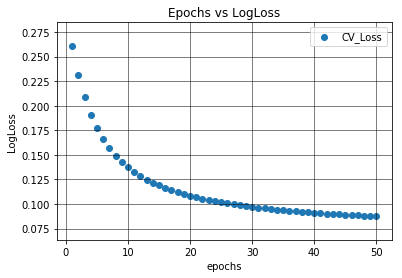

Optimal Weight Vector Is: [1.19788585]
Optimal Intercept Is -0.09076579013198308


In [105]:
alpha=0.0001 #Regularization(lambda)
eta0=0.0001 #Learning rate
N=len(fcv)
epochs=50
w,b=train(fcv,y_cv_new,epochs,alpha,eta0)
print("Optimal Weight Vector Is:", w)
print("Optimal Intercept Is",b)

In [103]:
def pred(w,b,X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        predict.append(sigmoid(z))
    return predict

In [ ]:
#Conditional Probability With Xtest

In [114]:
for i in range(5):
     print("Conditional Probability,P(Y==1|Xtest)",1/(1+np.exp(-(w*ftest[i]+b))))
     print("Actual Value is:" ,y_test[i])   
    
    


Conditional Probability,P(Y==1|Xtest) [0.86200777]
Actual Value is: 1
Conditional Probability,P(Y==1|Xtest) [0.01095213]
Actual Value is: 0
Conditional Probability,P(Y==1|Xtest) [0.03766366]
Actual Value is: 0
Conditional Probability,P(Y==1|Xtest) [0.09065251]
Actual Value is: 0
Conditional Probability,P(Y==1|Xtest) [0.84135747]
Actual Value is: 1
